# Visualisasi Data CCTV DPKP3

In [310]:
# Library imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [311]:
# Constants

DINAS = "DPKP3"
ORANGE = "#ff5733"
GREEN = "#4caf50"
BLUE = "#1f77b4"
RED = "#d62728"
PURPLE = "#9467bd"
BROWN = "#8c564b"
PINK = "#e377c2"
GRAY = "#7f7f7f"
OLIVE = "#bcbd22"
CYAN = "#17becf"
DARK_GREEN = "#1b9e77"
LIGHT_BLUE = "#6baed6"

In [312]:
# Load and filter dataset

dataset = pd.read_csv("monitoring_sample.csv")
filter = (dataset["Dinas"] == DINAS)
dpkp3_dataset = dataset[filter]

In [313]:
# Unique anomaly categories

categories = dpkp3_dataset["Anomali Kategori"].unique()

In [314]:
# def gen_pie()

## Status Anomali CCTV Dinas DPKP3
#### Jumlah CCTV Beranomali VS Tidak Beranomali

In [315]:
# jumlah cctv beranomali dan tidak
jml_tidak_beranomali = dpkp3_dataset[dpkp3_dataset["Anomali Kategori"] == "Tidak Beranomali"].shape[0]
jml_beranomali = dpkp3_dataset["Anomali Kategori"].shape[0] - jml_tidak_beranomali

In [316]:
# data
sizes = [jml_tidak_beranomali, jml_beranomali]
labels = [f"Tidak Beranomali\n({jml_tidak_beranomali})", f"Beranomali\n({jml_beranomali})"]
colors = [LIGHT_BLUE, ORANGE]

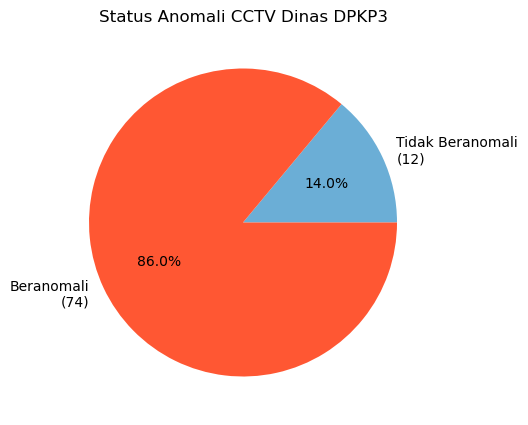

In [317]:
# pie plotting
plt.figure(figsize=(5, 5))
plt.title("Status Anomali CCTV Dinas DPKP3")
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors)
plt.show()

## Status CCTV dan Kondisinya
#### Jumlah CCTV per kategori kondisi

In [318]:
def get_rows(col: str, category: str) -> int:
    return dpkp3_dataset[dpkp3_dataset[col] == category].shape[0]

In [319]:
# jumlah tiap kategori
jml_tidak_berfungsi = get_rows("Anomali Kategori", "Tidak Berfungsi")
jml_visual_kurang_jelas = get_rows("Anomali Kategori", "Visual Kurang Jelas")
jml_salah_timestamp = get_rows("Anomali Kategori", "Salah Timestamp")
jml_offline = get_rows("Anomali Kategori", "Offline")
jml_tidak_berjalan_normal = get_rows("Anomali Kategori", "Tidak Berjalan Normal")
jml_terhalang_objek = get_rows("Anomali Kategori", "Terhalang Objek")


In [320]:
# data
sizes = [jml_tidak_beranomali, jml_tidak_berfungsi, jml_visual_kurang_jelas, jml_salah_timestamp, jml_offline, jml_tidak_berjalan_normal, jml_terhalang_objek]
labels = ["Tidak Beranomali", "Tidak Berfungsi", "Visual Kurang Jelas", "Salah Timestamp", "Offline", "Tidak Berjalan Normal", "Terhalang Objek"]
colors = [BLUE, OLIVE, RED, PURPLE, BROWN, PINK, CYAN]

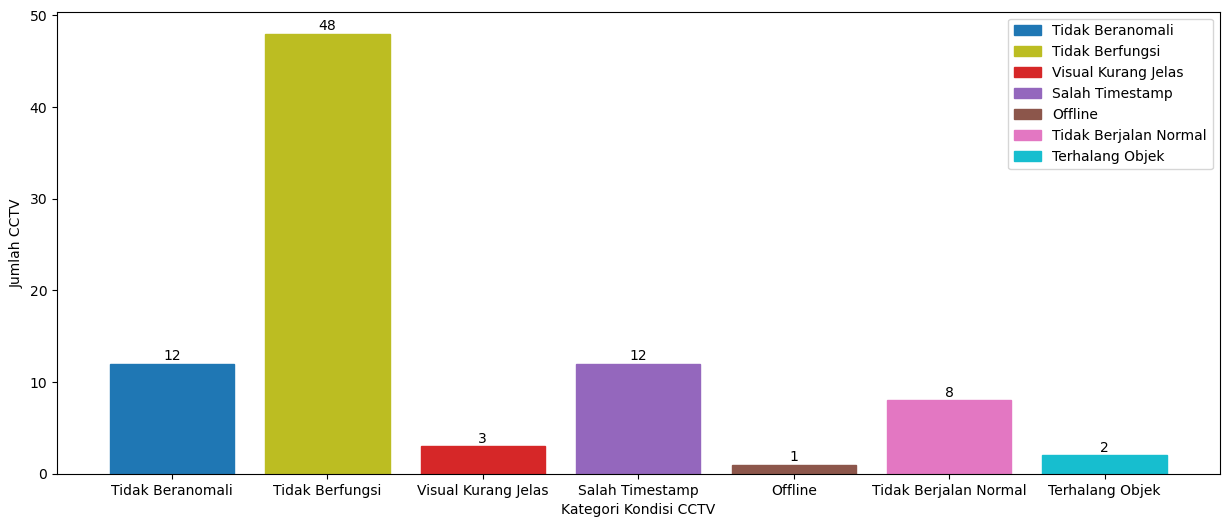

In [321]:
# bar plotting
plt.figure(figsize=(15, 6))
bars = plt.bar(labels, sizes)

for bar, color in zip(bars, colors):
    bar.set_color(color)

for bar, size in zip(bars, sizes):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 0.05,
             str(size),
             ha="center",
             va="bottom")

plt.legend(bars, labels, loc="upper right")
plt.ylabel("Jumlah CCTV")
plt.xlabel("Kategori Kondisi CCTV")
plt.show()

In [322]:
print(categories)

['Tidak Berfungsi' 'Visual Kurang Jelas' 'Salah Timestamp'
 'Tidak Beranomali' 'Offline' 'Tidak Berjalan Normal' 'Terhalang Objek']
